In [1]:
import numpy as np
TestPerf = np.load("Test_Perf_Record_CurriculumBaseline.npy")
ValError = np.load("Val_Error_Record_CurriculumBaseline.npy")

In [2]:
this = np.sum(np.sum(TestPerf,axis=0),axis=0)
NumComplete = 0
while this[NumComplete] >0:
    NumComplete +=1
print(NumComplete)

31


In [3]:
TestPerf = TestPerf[:,:,0:NumComplete]
ValError = ValError[:,:,0:NumComplete]

In [4]:
TestPerf_Mean = TestPerf.mean(axis=2)
TestPerf_StE = TestPerf.std(axis=2) / np.sqrt(NumComplete)

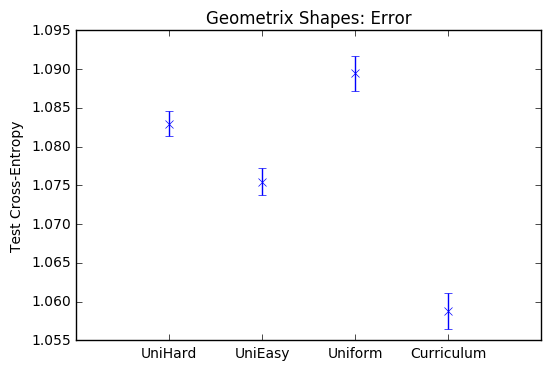

In [6]:
import matplotlib.pyplot as plt

flag = 0

labels = ['Hard','Easy','Uni','Curriculum']
plt.errorbar(np.array([1,2,3,4],dtype=int),TestPerf_Mean[:,flag],yerr = TestPerf_StE[:,flag],marker ='x',linestyle='none')
my_xticks = ['UniHard','UniEasy','Uniform','Curriculum']
plt.xticks(np.array([1,2,3,4],dtype=int), my_xticks)
thisplot = plt.gca()
thisplot.set_xlim(0,5)
if flag == 0:
    thisplot.set_title('Geometrix Shapes: Error')
    thisplot.set_ylabel('Test Cross-Entropy')
else:
    thisplot.set_title('Geometrix Shapes: Accuracy')
    thisplot.set_ylabel('Test Accuracy')

plt.show()

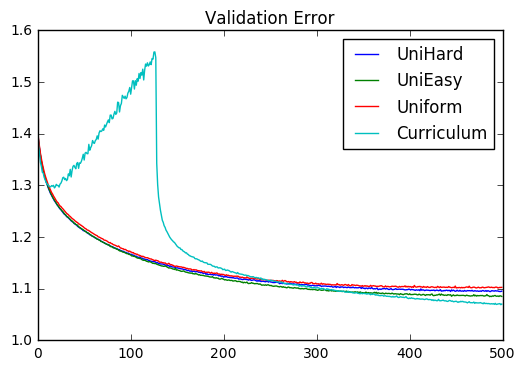

In [14]:
plt.plot(np.mean(ValError,axis=2))
plt.legend(['UniHard','UniEasy','Uniform','Curriculum'])
thisplot = plt.gca()
thisplot.set_title('Validation Error')
plt.show()

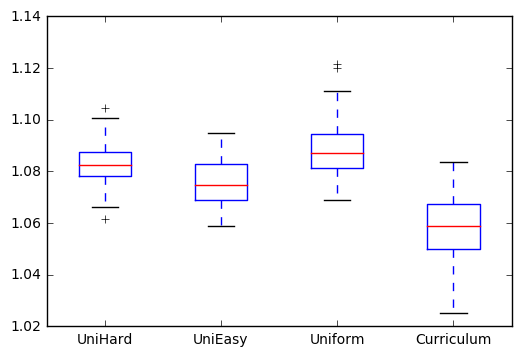

In [15]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
data = TestPerf[:,0,:]
ax.boxplot(data.T)
my_xticks = ['UniHard','UniEasy','Uniform','Curriculum']
plt.xticks(np.array([1,2,3,4],dtype=int), my_xticks)
plt.show()

In [8]:
from scipy.stats import ttest_rel

In [15]:
ttest_rel(TestPerf[1,flag],TestPerf[2,flag])

Ttest_relResult(statistic=-5.508920832193764, pvalue=5.537546086718904e-06)